# Исследование закономерностей определяющих успешность игр

  В нашем распоряжении исторические данные до 2016 года, о продаже компьютерных игр, такие как оценки пользователей и экспертов, жанры и платформы (например Xbox или Playstation), а так же данные от ESRB.* Необходимо выявить закономерности определяющие успешность игры, чтобы выделить потенциально популярные продукты и спланировать рекламные компании. 


  *ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Основные задачи
1. Отработать принципы работы с данными
2. Выявить потенциально прибыльные платформы


# План выполнения проекта

1. Подключить необходимые библиотеки и загрузить данные из датасета

2. Провести предобработку данных предоставленного датасета, для дальнейшего анализа
* Привести названия столбцов к единому формату
* Преобразовать типы данных в столбцах в соответствии с их значениями
* Обработать пропущенные значения при необходимости (особое внимание уделить значениям "tbd" в столбце с оценкой пользователей
* Посчитать суммарные продажи во всех регионах и добавить столбец с расчетами в датасет

3. Провести исследовательский анализ данных
* Изучить сколько игр выпускалость в разные года. Проверить актуальны ли данные за все периоды
* Изучить как менялись продажи по платформам. Выделить платформы с наибольшими суммарными продажамаи и построить график распределения по годам. Выяснить за какой характерный срок появляются новые и исчезают старые платформы
* Определить актуальный период, для построения прогноза на 2017 год, без учета данных за предыдущие годы
* Определить какие платформы лидируют по продажам, растут или падают. Сделать выборку потенциально прибыльных платформ.
* Построить диаграмму размаха по глобальным продажам игр в разбивке по платформе
* Определить влияние отзывов и критиков на продажи внутри одной популярной платформы, с построением диаграммы рассеяния и подсчетом кореляции между отзывами и продажами
* Соотнести выводы с продажами игр на других платформах
* Изучить распределение игр по жанрам и сделать выводы об уровне продаж в зависимости от жанра

4. Составить портрет пользователя для каждого из регионов (NA, EU, JP)
* Топ-5 самых поплуярных платформ
* Топ-5 самых популярных жанров
* Определить влияние рейтинга ESRB на продажи в отдельном регионе

5. Проверить гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

6. Сделать общий вывод

## Загрузка библиотек, данных и ознакомление с ними

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings

from scipy import stats as st

In [2]:
# Сохраним датасет в переменную data
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Изучем название столбцов и какие они содержат значения по первым 5 строкам
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

### Приведение названий столбцов к единому формату

In [4]:
# Приведем все названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)

### Преобразование типов данных в соотвествии с их значениями

In [5]:
# Вывод информации о текущих типах данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Очевидное несоответствие типа значениям в столбцах:
* year_of_release (так как в значениях указан только год, логичнее использовать int вместо float)
* user_score (object вместо float)
Это необходимо исправить

In [6]:
# year_of_release приведем к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [7]:
# user_score посмотрим, какие есть значения
data.user_score.unique()

# Избавляемся от текстовых значений
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

# Приводим столбец к правильному типу
data['user_score'] = data['user_score'].astype(float)

Очевидно, что рейтинг должен иметь числовые значения, однако среди них присутствует текстовое значение "TBD", что определенно мешает преобразовать столбец.

TBD — (to be determined), в контексте рейтингов, это означает, что рейтинг не определен, по сути это NaN значение, поэтому заменили TBD на NaN и привели столбец к типу Float.

Столбец year_of_release преобразуем в тип int, так как он хранит целочисленные значения.

### Пропуски в данных

In [8]:
# Посмотрим общее количество пропусков по столбцам
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
# Изучим пропуски в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Несмотря на большое количество продаж в строке 659, строки для исследования не информативны, так как пропущены
# значения в названии и жанре игры, а так же нет никакого из рейтингов. Удаляем.
data.dropna(subset = ['name'], inplace=True)

In [11]:
# Изучим содержимое строк, где пропущены значения в столбце year_of_release
data[data['year_of_release'].isna()]
# Похоже в названиях некоторых игр есть год выпуска.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
# Проверим, может ли год выпуска игры не соответствовать, году указанному в названии.
data.query('name == "Madden NFL 2004"')
# Похоже использовать год из названия, будет не корректно, по первому же взятому примеру видно, 
# что Madden NFL 2004 была выпущена в 2003 году.
# Так же некорректно будет заполнять пропуски и по году выпуска на других платформах
# Так как известный факт, что одна и та же игра может появлятся на разных платформах с существенными интервалами во времени

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [13]:
# Поскольку мы не можем получить точные значения для пропусков и их небольшое количество, 
# строки с пропуском года, придется исключить
data.dropna(subset = ['year_of_release'], inplace=True)

In [14]:
# В столбце рейтинг фактически есть значение RP - рейтинг ожидается, это эквивалентно пропуску, приведем в единый вид.
data.loc[data.loc[:,'rating'].isnull(),'rating'] = 'RP'

Из выборки были удалены строки с пропусками в названии и жанре, так как эти данные малоинформативны для исследования и таких строк в датасете небольшое количество.

Несмотря на наличие возможности вычислить приблизительный год выпуска по другим значениям датасета, я пришел к выводу, что они окажутся не точными, поэтому такая замена скорее негативно скажется на исследовании. Принято решение исключить строки с пропусками из выборки.

Значения в столбцах оценка критиков и оценка пользователей, являются оценочными, было бы не справедливо синтезировать оценки по среднему или медианному значению, очевидно, что такая замена может исказить исследование. Оставим как есть.

Для пропусков в столбце рейтинг у нас есть специальное значение "RP" - рейтинг ожидается, его и будем использовать для всего датафрейма.

### Проверка на дубликаты

In [15]:
print('Количество явных дубликатов в датасете:', data.duplicated().sum())

Количество явных дубликатов в датасете: 0


In [16]:
# Поищем дубликаты в жанрах
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
# Поищем дубликаты в рейтинге
data.rating.unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [18]:
# Всего в системе ERCB существует 7 значений, а тут 8, кто-то лишний затесался.
# K-A это устаревшее название значения E, заменим, для удобства в дальнейшем, нам сейчас важнее цифры
# Чем исторически точные названия
data = data.replace({'rating':{'K-A':'E'}})

В целом дубликаты в датасете практически отсутствуют. Даже совпадение двух категорий в рейтинге нельзя назвать полными дубликатами, так как у старых игр указывалось старое название рейтинга. Но для удобства я привел все в соответствии с современной классификацией.

### Расчет суммарных продаж для всех регионов

In [19]:
data['total_sales'] = data.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


Предоботка данных выполнена.

* Заголовки столбцов приведены в нижний регистр
* Типы данных заданы в соответствии со значениями
* Пропуски изучены и внесены коррективы для приведения данных к единому формату, без существенных потерь данных
* Проведен поиск дубликатов, столбец рейтинг приведен в единый формат
* Расчита и добавлен столбец с общей суммой продаж для всех регионов

## Исследование данных

### Изучение распределения количества игр по годам

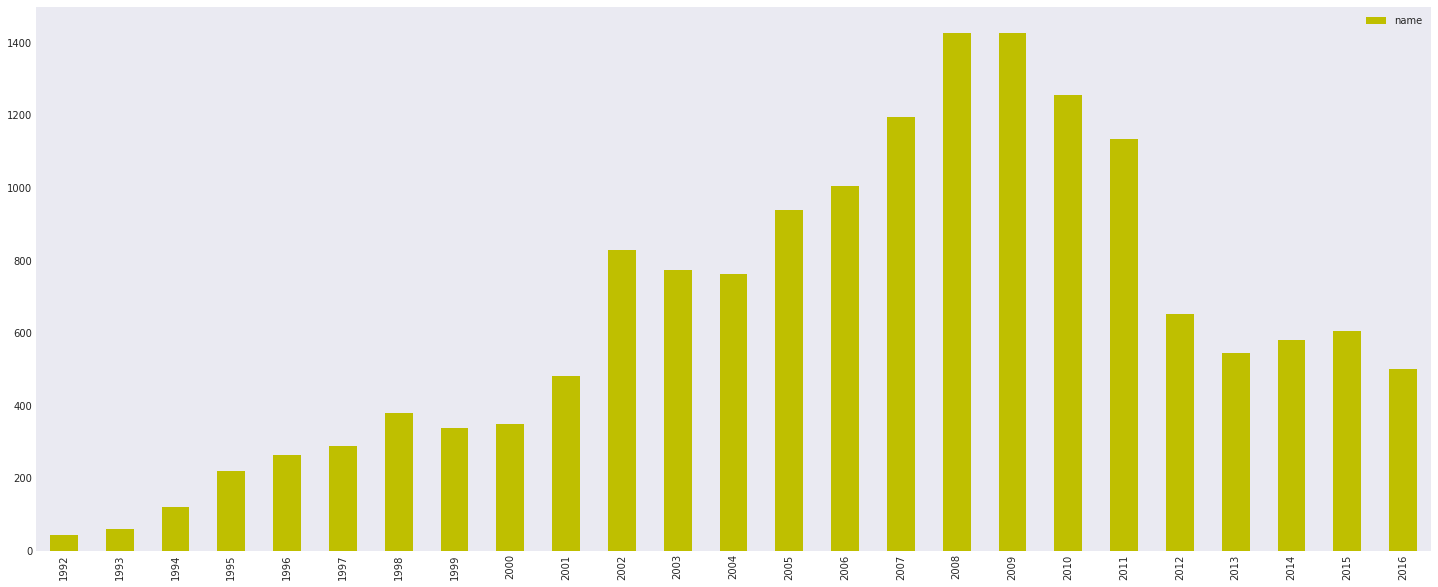

In [21]:
#Выполним группировку по количеству игр выходивших в определенный год
years_group = data.groupby('year_of_release').agg({'name':'count'})

#Выберем оформление графика
#plt.style.available

# Для большого количества групп значений хорошо подходит столбчатый график с четким разделением по годам
with plt.style.context('seaborn-dark'):
    years_group.loc[1992:].plot(y='name', kind='bar', figsize=(25,10), color='y')
    plt.xlabel('')

Можно увидеть уверенный рост количества выпускаемых игр вплоть до 2009 года, 2008 и 2009 года стали пиками по количеству выпускаемых игр, начиная с 2010 года количество выпускаемых игр стало падать, к 2012 году сократилось более чем в два раза и плюс минус зафиксировалось на этой отметке. 

Падение вероятнее всего можно объяснить появлением игр на мобильных платформах, что добавило на рынок мощного игрока, который перетянул на себя кусок одеяла.

### Анализ продаж по платформам 
* Выделить платформы с наибольшими суммарными продажами
* Построить график распределения по годам 
* Выяснить за какой характерный срок появляются новые и исчезают старые платформы

Text(0, 0.5, 'Количество продаж')

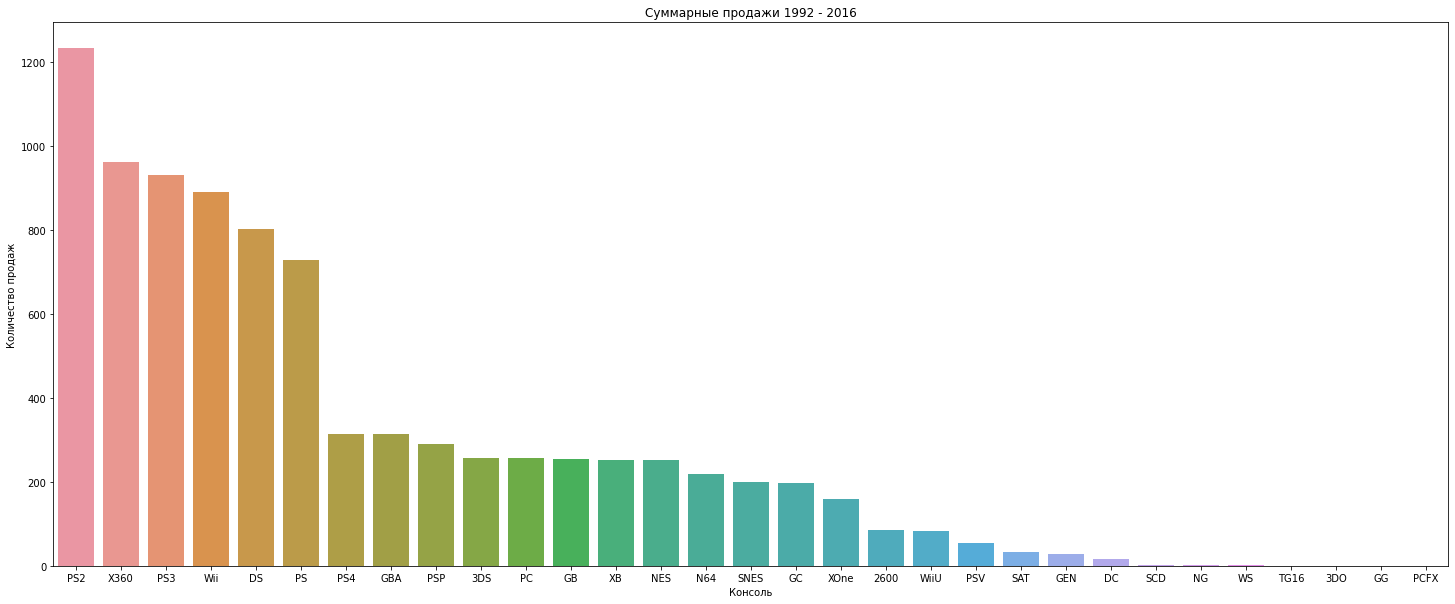

In [22]:
# Сводная таблица для подсчета суммарного количества проданных игр для каждой платформы
sales_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

# График для определения лидеров рынка
plt.figure(figsize=(25,10))
sns.barplot(x=sales_platform.index,y=sales_platform['total_sales'])
plt.title("Суммарные продажи 1992 - 2016")
plt.xlabel("Консоль")
plt.ylabel("Количество продаж")

Исходя из представленных данных можно выделить топ-6 по количеству проданных игр это Playstation 2, Xbox 360, PlayStation 3, Wii, Nintendo DS и Playstaion (Первая). Остальные консоли имеют гораздо менее скромные показатели.

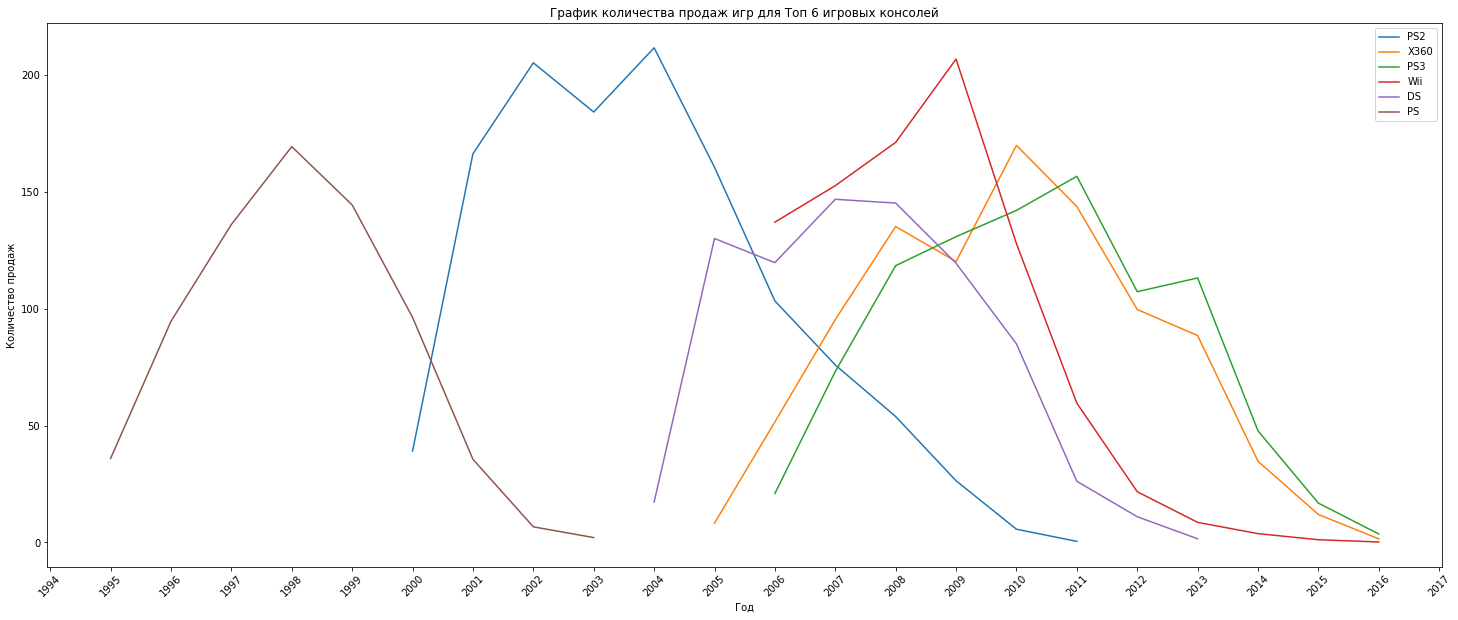

In [23]:
# Функция вовзращающая сводную таблицу по заданным параметрам
def year_platform(name, df):    
    data_top = data[(data['platform'] == name) & (data['year_of_release'] > 1994)]
    final = (data_top.pivot_table(index='year_of_release', 
                                values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False))
    return final

# Выделим Топ 6 игроков рынка
top_6 = data.pivot_table( index='platform', values='total_sales', 
                         aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_6 = top_6.reset_index().rename_axis(None, axis=1)

# Укажем заголовки и параметры для графика
plt.figure(figsize=(25,10))
plt.title('График количества продаж игр для Топ 6 игровых консолей')
plt.xlabel('Год')
plt.xticks(np.arange(len(data['year_of_release'])), rotation = 45)
plt.ylabel('Количество продаж')

# При помощи функции построим график продаж игр для Топ 6 консолей по годам
for i in list(top_6['platform']):
    sns.lineplot(data=year_platform(i,data)['total_sales'], label=i)
    plt.legend()

Исходя из представленной информации, можно увидеть, что срок жизни консолей составляет в среднем около 10 лет. 

Особенно интересна политика компании Sony, они выпускали свежую консоль дважды, на похожих показателях падения продаж и вполне успешно подогревали интерес к своим консолям. 

У всех платмформ кроме Wii графики продаж весьма похожи, выпуск - плавный рост сроком от 3 до 5 лет, а затем такое же плавное снижение продаж. 

У Wii же можно видеть достаточно мощный старт, ускоренный рост, который почти дотянулся до успеха PS2, а затем затяжной спад и самый длительный период существования на минимальных показателях продаж. 

### Определение актуального периода для прогноза на 2017 год

Для прогноза на 2017 год, для такой динамично развивающейся индустрии, как компьютерные игры, актуальными буду данные за послледние 3 года.

In [24]:
# Сказано - сделано, делаем выборку за последние 3 года.
actual_data = data.query('year_of_release >= 2013')

In [25]:
# Посмотрим какие платформы попали в выборку
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

В выборку попали пересечения смены поколений самых популярных консолей, PS3 и PS4, Xbox 360 и Xbox One, Wii и WiiU.
Все разнообразие портативных консолей последних двух поколений от Sony и Nintendo. Ну и несменный PC.

### Анализ продаж игр для платформ заданного периода

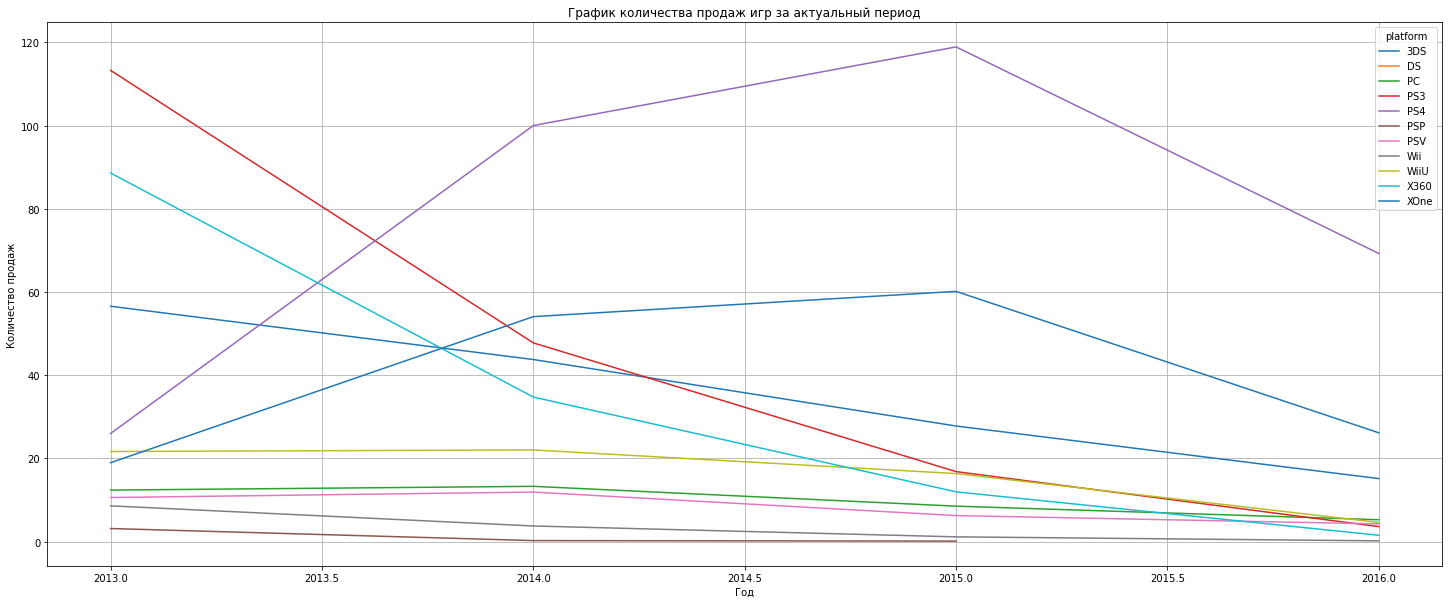

In [26]:
# Сводная таблица для анализа общей картины продаж в актуальный период
actual_data.pivot_table(index='year_of_release', columns = 'platform', 
                 values='total_sales', aggfunc='sum').plot(grid=True, figsize=(25, 10))

# Параметры графика
plt.title('График количества продаж игр за актуальный период')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

* Четко видны лидеры рынка, это свежие платформы PS4 и Xboxe One
* В сравнении с прошлыми годами и большим количеством игроков рынок становится более дифференцированным, выход новых консолей происходит все быстрее. Если раньше путь от старта до заката занимал в среднем 10 лет, то теперь всего 3-4 года.
* Продажи игр для настольных консолей гораздо выше, чем для PC или портативных приставок.
* В 2016 году видно падение продаж у всех игроков рынка, а это значит стоит ждать выхода приставок нового поколения от Xbox и PS, так точно, эта политика прослеживается за весь период, и вполне ожидаемо ждать новой волны интереса к ним, соответственно именно эти приставки и будем считать потенциально самыми прибыльными в 2017 году.

### Диаграмма размаха по глобальным продажам игр в разбивке по платформе

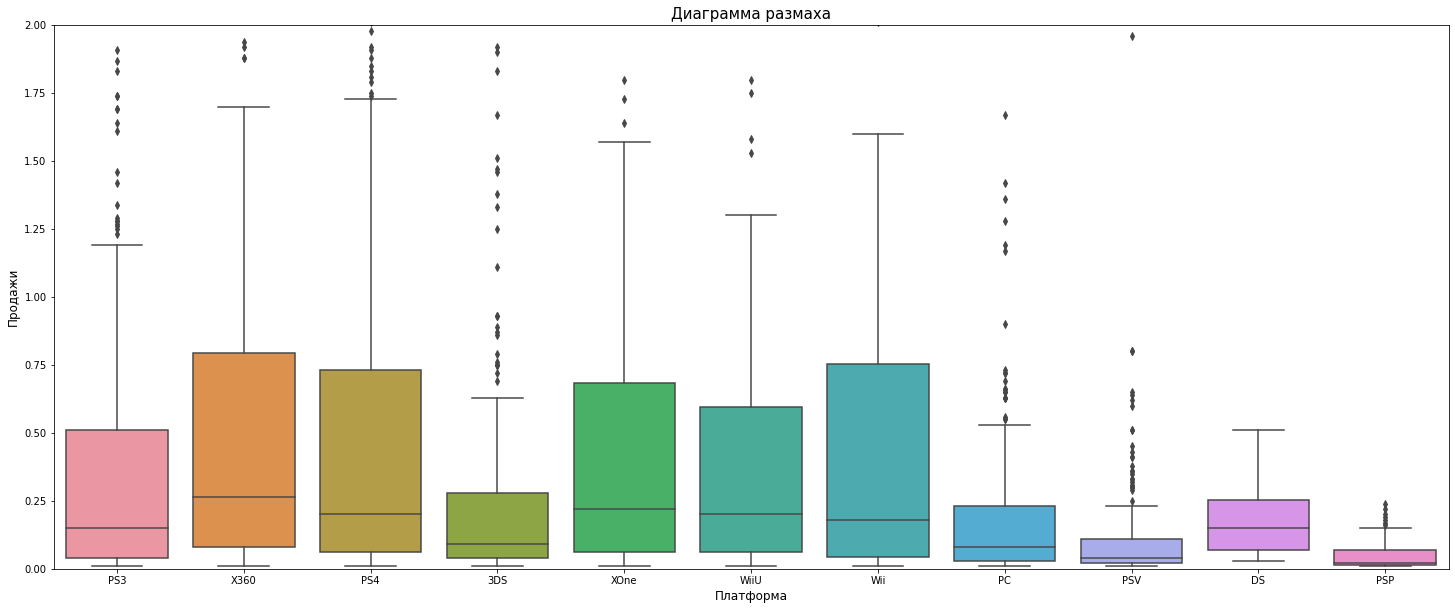

In [27]:
# Построим диаграмму размаха для актуального периода
plt.figure(figsize=(25,10))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
# Поработаем с визуалом
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.ylim([0, 2])
plt.show()

Безусловно на диаграмме размаха присутствуют выбросы, однако вряд ли это можно считать аномалиями, ведь успех каждой отдельно взятой игры уникален. 

Исходя из полученной диаграммы можно сделать следующие выводы:
* Исходя из медианных значений можно выделить лидеров продаж, похоже это все настольные консоли: 
  Xbox 360, PS3, PS4, Xbox One, WiiU, Wii
* Низкие показатели продаж у портативных консолей, DS, 3DS, PSP, PSV и у ПК.

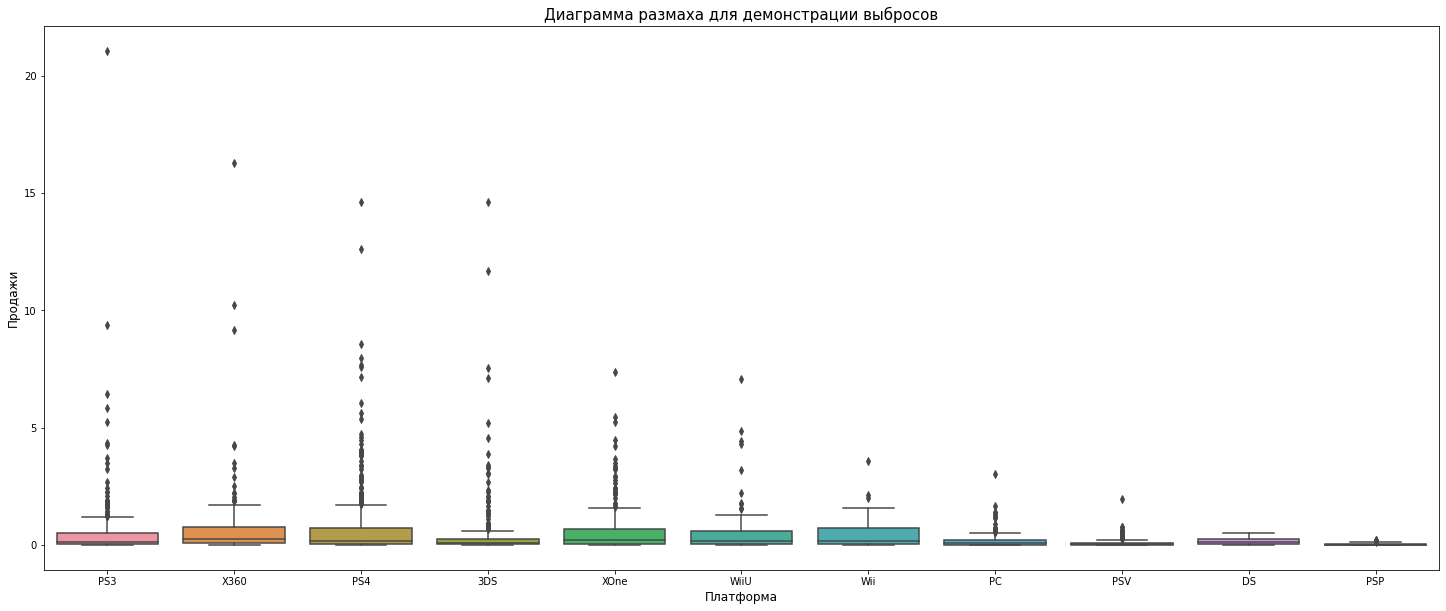

In [28]:
# Построим диаграмму размаха для актуального периода
plt.figure(figsize=(25,10))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
# Поработаем с визуалом
plt.title('Диаграмма размаха для демонстрации выбросов', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

Уникальные, если можно так выразиться "выстреливающие" игры, вполне характерны для этого рынка, нельзя их так просто сбрасывать со счетов, по графику четко видно что практически у всех платформ их достаточно много и их доли продаж высоки.

### Определение влияние отзывов и критиков на продажи

In [29]:
# Срез по интересующей нас платформе
xbox_data = actual_data.query('platform == "X360"')
xbox_data = xbox_data.sort_values('user_score',ascending = False)

In [30]:
# Выведем результат расчета корреляций
print('Корреляция между оценками пользователей и продажами Xbox 360:', xbox_data['user_score'].corr(xbox_data['total_sales']))
print('Корреляция между оценками критиков и продажами Xbox 360:', xbox_data['critic_score'].corr(xbox_data['total_sales']))

Корреляция между оценками пользователей и продажами Xbox 360: -0.011742185147181356
Корреляция между оценками критиков и продажами Xbox 360: 0.3503445460228664


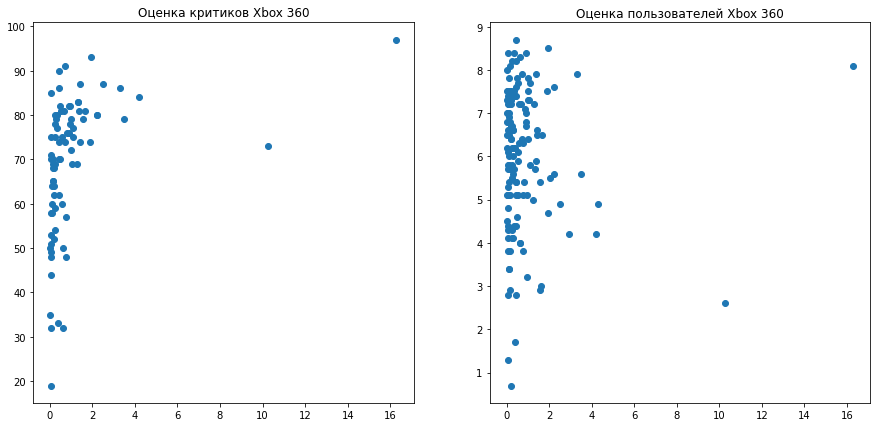

In [31]:
# Построим графики рассеивания
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(1,2, figsize = (15,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =xbox_data)
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =xbox_data)
scatter_ax.set_title('Оценка критиков Xbox 360')
scatter_ax2.set_title('Оценка пользователей Xbox 360')
plt.show()

Корреляция между оценкой пользователей и продажами практически отсутствует, а между оценкой критиков и продажами слишком слабая, чтобы говорить о прямом влиянии. Можно сделать вывод, что для платформы X360 оценки чьи бы то ни было, не влияют на количество проданных игр.

In [32]:
# Срез по интересующим нас платформам
PS4_data = actual_data.query('platform == "PS4"')
Wii_data = actual_data.query('platform == "WiiU"')
PS4_data = PS4_data.sort_values('user_score',ascending=False)
WiiU_data = Wii_data.sort_values('user_score',ascending=False)

In [33]:
# Выведем результат расчета корреляций
print('Корреляция между оценками пользователей и продажами PS4:', PS4_data['user_score'].corr(PS4_data['total_sales']))
print('Корреляция между оценками критиков и продажами PS4:', PS4_data['critic_score'].corr(PS4_data['total_sales']))

print('Корреляция между оценками пользователей и продажами WiiU:', WiiU_data['user_score'].corr(WiiU_data['total_sales']))
print('Корреляция между оценками критиков и продажами WiiU:', WiiU_data['critic_score'].corr(WiiU_data['total_sales']))

Корреляция между оценками пользователей и продажами PS4: -0.031957110204556424
Корреляция между оценками критиков и продажами PS4: 0.40656790206178134
Корреляция между оценками пользователей и продажами WiiU: 0.41933048192661876
Корреляция между оценками критиков и продажами WiiU: 0.3764149065423913


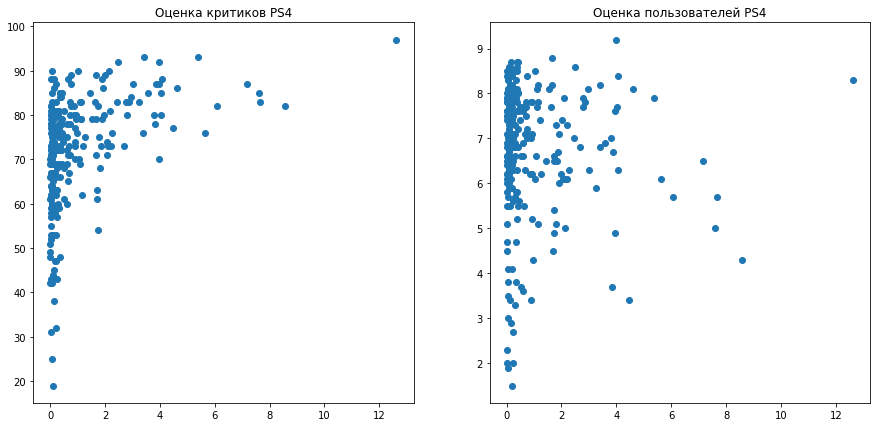

In [34]:
# Построим графики рассеивания
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(1,2, figsize = (15,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =PS4_data)
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =PS4_data)
scatter_ax.set_title('Оценка критиков PS4')
scatter_ax2.set_title('Оценка пользователей PS4')
plt.show()

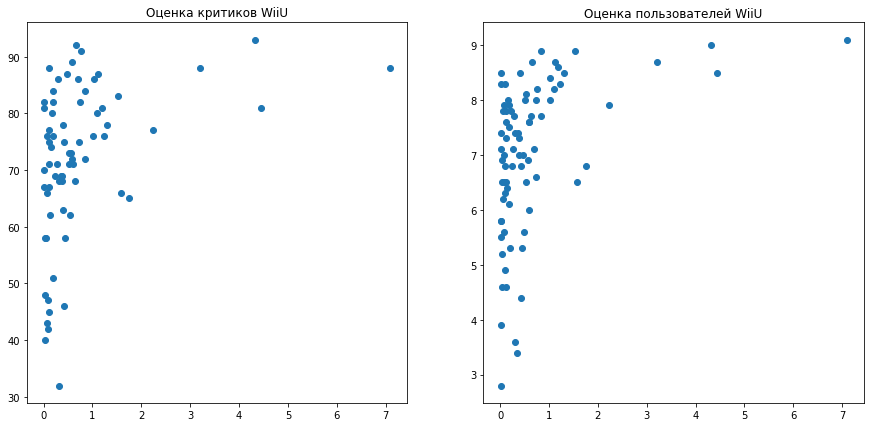

In [35]:
# Построим графики рассеивания
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(1,2, figsize = (15,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =WiiU_data)
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =WiiU_data)
scatter_ax.set_title('Оценка критиков WiiU')
scatter_ax2.set_title('Оценка пользователей WiiU')
plt.show()

Для платформ WiiU и PS4 значения корреляции, хоть и ближе к умеренным, однако все еще достаточно слабые. Можно прийти к выводам, что перед покупкой игр, пользователи поглядывают на рейтинги, однако это далеко не самый решающий фактор.

### Изучение распределения игр по жанрам

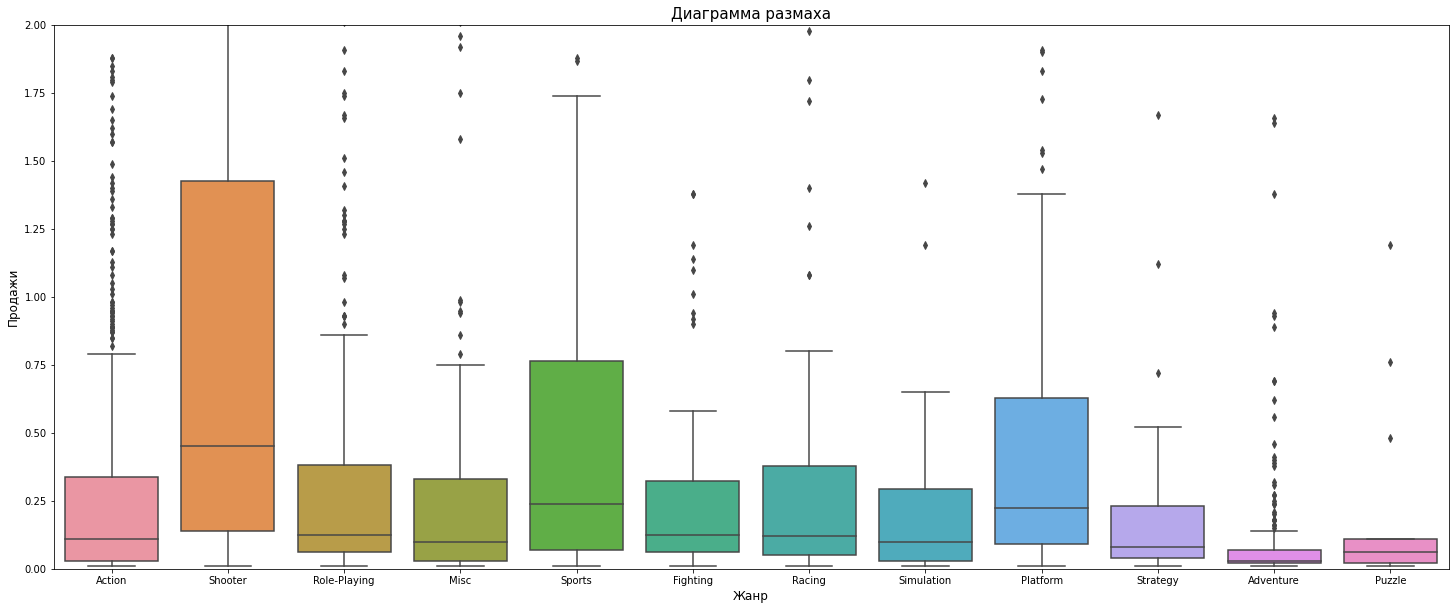

In [36]:
# Создадим сводную таблицу для создания рейтинга жанров
# genre_rating = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    # by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

#График для анализа результатов
# plt.figure(figsize=(25,10))
# plt.title('Рейтинг жанров по количеству продаж ',fontsize=15)
# sns.barplot(data=genre_rating, x='genre', y='total_sales')
# plt.xlabel('Жанр',fontsize=12)
# plt.ylabel('Продажи',fontsize=12)
# plt.show()

# Построим диаграмму размаха для актуального периода
plt.figure(figsize=(25,10))
sns.boxplot(data=actual_data, x='genre', y='total_sales')
# Поработаем с визуалом
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.ylim([0, 2])
plt.show()

   Вполне наглядный результат. 
   
Если проводить анализ по медине значений то можно увидеть:

* Самый стабильно продаваемый жанр это Шутеры, следом Спортивные симуляторы, а за ними платформеры.
* Средние продажи жанров Экшн, РПГ и Misc не так высоки, однако большое количество выбросов говорит о том, что среди них много очень успешных проектов. Получается что в массе своей эти жанры не особо продаются, а вот вероятность наткнутся на сильную может даже легендарную игру в этом жанре достаточно высока. Все это касается и жанра Адвенчур, но в несколько меньшей степени. 
* Файтинги, Гонки, Симуляторы и Стратегии в сравнении показывают весьма скромный результат.
* Ну и жанр головоломок остался самым не примечательным, средние продажи на низком уровне и выбросов достаточно мало.


## Портрет пользователя Америки, Европы и Японии и их сравнение

### Топ 5 Платформ

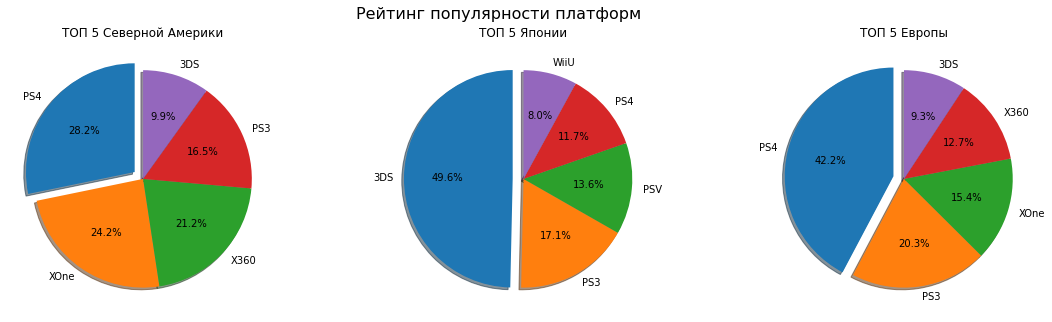

In [37]:
#Группируем по платформе для каждого региона
america = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
europe = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
japan = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

#Чтобы красиво было
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
#Урвем кусок пирога
explode = (0.1, 0, 0, 0, 0)
#Круговая диаграмма для Америки
plt.subplot(1, 2, 1)
america.plot(x='platform', y='na_sales', kind='pie',
                    grid=True, title='ТОП 5 Северной Америки', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
#Круговая диаграмма для Европы
plt.ylabel('')
plt.subplot(1, 2, 2)
europe.plot(x='platform', y='eu_sales', kind='pie',
                    grid=True, title='ТОП 5 Европы', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
#Круговая диаграма для Японии
plt.ylabel('')
plt.subplot(1, 3, 2)
japan.plot(x='platform', y='jp_sales', kind='pie',
                    grid=True, title='ТОП 5 Японии', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
plt.ylabel('')
fig.suptitle('Рейтинг популярности платформ ', fontsize=16)
#Вывод диаграмм
plt.show()

Для Европы (в большей степени) и Северной Америке (чуть в меньшей степени) безусловным лидером является PS4. Интересен тот факт что в Европе в отличии от Америке предпочитают покупать игры для уже устаревшей PS3, чем переходить на свежую XOne, консервативная прослойка. Прочие места рейтинга поделили 3DS и старый Xbox 360.

В Японии рейтинг возглавляет 3DS, затем PS3, DS и PSP заняли твердую середину, замыкающая консоль WiiU.

В целом очень похоже на то, что в лидерах рейтинга Япония поддерживает отечественного производителя. Вероятнее всего, родная реклама делает свое дело эффективнее зарубежной. Впрочем в Японии весь рейтинг состоит из консолей японской разработоки.  

### Топ 5 Жанров

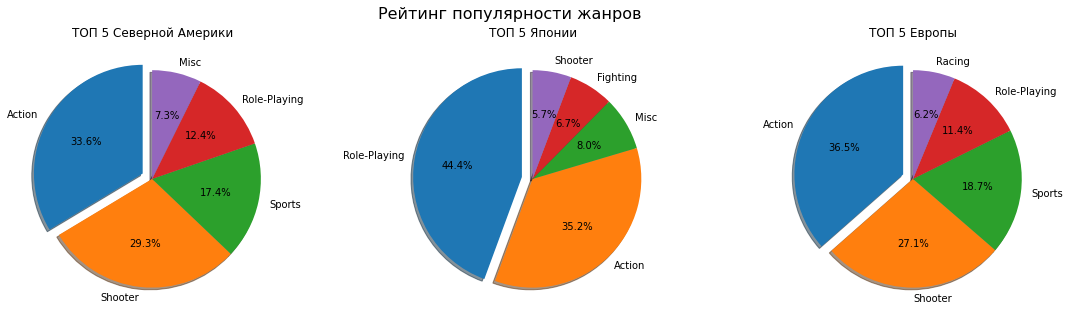

In [38]:
#Группируем по жанру для каждого региона
america = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
europe = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
japan = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

#Чтобы красиво было
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
#Урвем кусок пирога
explode = (0.1, 0, 0, 0, 0)
#Круговая диаграмма для Америки
plt.subplot(1, 2, 1)
america.plot(x='genre', y='na_sales', kind='pie',
                    grid=True, title='ТОП 5 Северной Америки', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
#Круговая диаграмма для Европы
plt.ylabel('')
plt.subplot(1, 2, 2)
europe.plot(x='genre', y='eu_sales', kind='pie',
                    grid=True, title='ТОП 5 Европы', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
#Круговая диаграма для Японии
plt.ylabel('')
plt.subplot(1, 3, 2)
japan.plot(x='genre', y='jp_sales', kind='pie',
                    grid=True, title='ТОП 5 Японии', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
plt.ylabel('')
fig.suptitle('Рейтинг популярности жанров', fontsize=16)

#Вывод диаграмм
plt.show()

Мнения о жанрах в Северной Америке и Европе совпали. Больше всего любят побегать в Экшнах и пострелять в Шутерах, чуть менее популярно поиграть в Фифу с друзьями (жанр Спорт), а вот Misc в Америке любят чуть больше чем в Европе, там больше любят гоночные симуляторы, важно отметить что РПГ заняло предпоследнюю строчку рейтинга в обоих регионах.

В Японии же огромную долю рынка занимаю РПГ, затем идут Экшены, и примерно в равных долях Misc, Файтинги и Шутеры. Стрелялки в Японии, похоже не в чести. Другая культура.

### Влияние рейтинга  ESRB на продажи по регионам

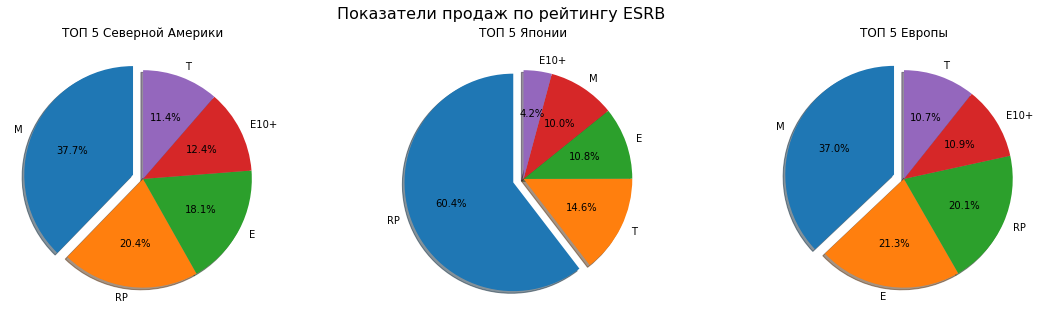

In [39]:
japan_ret = actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
europe_ret = actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
america_ret = actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)

#Слышал что круговые диаграммы сейчас не модные, а в этом случае удобно же.
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
#Урвем кусок пирога
explode = (0.1, 0, 0, 0, 0)
#Круговая диаграмма для Америки
plt.subplot(1, 2, 1)
america_ret.plot(x='rating', y='na_sales', kind='pie',
                    grid=True, title='ТОП 5 Северной Америки', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
#Круговая диаграмма для Европы
plt.ylabel('')
plt.subplot(1, 2, 2)
europe_ret.plot(x='rating', y='eu_sales', kind='pie',
                    grid=True, title='ТОП 5 Европы', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
#Круговая диаграма для Японии
plt.ylabel('')
plt.subplot(1, 3, 2)
japan_ret.plot(x='rating', y='jp_sales', kind='pie',
                    grid=True, title='ТОП 5 Японии', explode=explode,
                    autopct='%1.1f%%', shadow=True, startangle=90)
plt.ylabel('')
fig.suptitle('Показатели продаж по рейтингу ESRB', fontsize=16)

#Вывод диаграмм
plt.show()

Американцы и Европейцы предпочитают играть в игры рейтинга М и Е, показатели очень похожи, это игры для всех и игры для взрослых, менее объемные продажи у игр с рейтингам Т, E10+ и без рейтинга. Пропорции немного отличаются, но не критично. Регионы очень похожи по своим показателям.

А вот в Японии учитывая, что и платформы преобладают отечественные, и жанр в Америке и Европе не популярный в лидерах (РПГ), больше половины продаваемых игр без рейтинга. Это может говорить о том, что Японцы свои игры этой классификации не подвергают и играют в отечественные игры на отечественных консолях. Я бы ставил на это.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и анльтернативную гипотезы:

    Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
    H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Так как выборки независимы будем использовать t-критерий Стьюдента

In [40]:
# Запишем в переменные необходимые значения, за исключением нулевых значений
xbox_one = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']

In [41]:
# Запустим тест
results = st.ttest_ind(xbox_one, pc)

In [42]:
# Задаем значение Альфа
alpha = .05

# Вывод результата
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Опровергаем нулевую гипотезу")
else:
    print("Не получилось опровергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось опровергнуть нулевую гипотезу


Вывод: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и анльтернативную гипотезы:

    H0: Средние пользовательские рейтинги жанров Action и Sports равны
    H1: Средние пользовательские рейтинги жанров Action и Sports различаются
    
Так как выборки независимы будем использовать t-критерий Стьюдента


In [43]:
# Запишем в переменные необходимые значения, за исключением нулевых значений
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

In [44]:
# Запустим тест
results = st.ttest_ind(sports, action)

In [45]:
# Задаем значение Альфа
alpha = .05

# Вывод результата
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Опровергаем нулевую гипотезу")
else:
    print("Не получилось опровергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Опровергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports различаются

## Вывод

Итоги проделанной работы.

Перед анализом была проведена подготовка данных к работе. Заголовки столбцов были приведены в единый формат. Типы данных были измененены в соответствии с их значениями, для возможности дальнейших операций с ними. Удалены строки с пропусками значений, которые могли повлиять на точность проводимого анализа. Прочие отсутствующие значений приведены к единому стандарту. Проведена проверка датасета на дубликаты, значения рейтинга ESRB приведены к актуальным. Произведен расчет общих суммарных продаж для всех регионов и добавлен в датасет.

В ходе анализа были сделаны следующие наблюдения.

Исходя из количества выпускаемых игр по каждому году всего датасета, можно увидеть как формировался рынок компьютерных игр с течением времени, можно отметить активный рост с 1995 по 2009 год, за счет того, что платформы существовали в среднем около 10 лет, выпускалось огромное количество игр, а после 2009 года, за счет роста конкуренции, ускорялись и выпуски новых платформ, на рынке постепеннь появлялись новые игроки, количество выпускаемых игр сокращалось и рынок стал более дифференцированным. 

Для дальнейшего исследования был выбран период по большей части уже сформировавшегося актуального рынка, с 2009 по 2016 год.

В условиях актуального глобального рынка можно отметить двух очевидных лидеров продаж, это игры для консолей Sony Playstation и Xbox. Считаю что их платформы будут самыми перспективными в 2017 году.

Так же стоит указать, что портативные консоли от Nintendo и Sony, а так же игры для PC, хоть им не свойственны такие же высокие показатели продаж, как для консолей, заняли свою нишу на рынке и дают стабильные показатели продаж.

Было рассмотрено влияние двух видов рейтингов на количество продаж: Оценки пользователей и Оценки критиков. По полученым выборочным данным можно прийти к выводу, что влияние либо отсутствует вовсе или минимальное.

Среди жанров выпускаемых игр так же есть определенная градация по сумме продаж для глобального рынка. Предлагаю выделить три категории.

* Безусловные лидеры:
Жанр Shooter, Спортивные симуляторы и Платформеры

Меньше слов, больше дела, как говорится

* Твердая середина:

Жанры Action, RPG, Misc

Представители этих жанров дают очень неплохие показатели продаж на глобальном рынке

* Менее востребованные

Жанры Гонки, Файтинги, Симуляторы, Адвенчуры, Стратегии и Головоломки

Представители этих жанров имеют относительно низкий уровень продаж


В ходе анализа так же были составлены портреты среднестатистического пользователя для трех регионов.

В Северной Америке самой популярной игровой платформой стала PS4, вторая по популярности XboxOne, так же в рейтинг вошли PS3, 3DS и Xbox 360.

Самым популярным жанром стал Экшн, второе место заняли Шутеры, остальные позиции разделили между собой Спортивные игры, РПГ и Misc.

Что касается рейтингов то первые позиции заняли M и E, это может говорить, что в игры играют и дети и взрослые. Логично.


Для Европы самой поплярной платформой стала PS4, на второй строчке PS3.

Популярность жанров, максимально схожа с предпочтениями Американцев.
То же самое касается и рейтингов игр.

А вот в рейтинг поплярных платформ Японии вошли только консоли японской разработкой, самой популярной оказалась Nintendo 3DS, далее PS3, PSV, PS4. WiiU

Поплярные жанры так же отличаются от Европы и Америки, РПГ определенно самый популярный жанр в Японии.

Огромную долю Японского рынка составляют игры без возрастного рейтинга, как такового, похоже возрастной ценз для компьютерных игр в Японии либо игнорируется либо используется другая система.

Исходя из проделанной работы, можно уверенно сказать, что приципы работы с данными отработаны. А что касается прогноза, вероятнее всего в скором времени стоит ожидать выхода новых платформ от Microsoft и Sony. Это безусловные лидеры продаж и потенциально самые прибыльные представители для игровой индустрии. Так же стоит отметить что Nintendo 3DS, хоть и выглядит скромно на общем фоне, однако портативный консоли это все таки уже отдельный рынок, на нем она явный лидер. Ну и всегда есть вероятность, что рынок развернет, какая-нибудь иновационная разработка, несмотря на то, что вход на рынок игровых платформ сейчас очень высок, индустрия наращивает темы своего развития, как знать, возможно скоро мы увидим новых игроков.